# Global Obesity Trends - Full Report

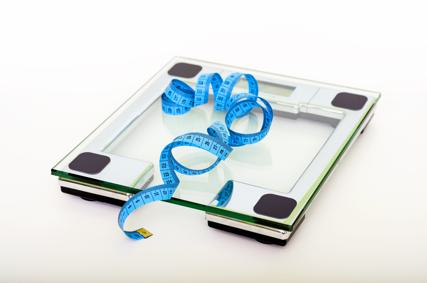

## Business Context

How has Body Mass Index (BMI) been changing over the last decades? It is common knowledge that global BMI is rising, but by how much? How quickly?

And which countries are most susceptible to these rising trends? The World Health Organistation (WHO) lists a high BMI as a major risk factor for heart disease, stroke, bone and joint problems, and a number of cancers, including breast, colon and endometrial cancer. It is also known that a healthy BMI increases your odds of a longer and healthier life. As a result analysing BMI data acts as a strong basis for learning about the global health situation and because it is a single measure, the data is easy to 
comprend and easy to collect.

## Objective

Using data from the NCD Risk Factor Collaboration (NCD-RisC), the goal is to put a spotlight on the current BMI trends globally and to perform an in-depth analysis of the situation using analytical and visual tools to highlight key trends. The data is based on the BMI of 200 countries from 1975 - 2016, a 41 year period. This dataset will be extended once additional data is supplied by NCD-RisC.

We will also create a BMI calculator so that users can see how their BMI compares to the recommendation. We will also plot the global average and the national average so they can compare with their peers.

## Summary

* The average BMI globally has increase by 15%. It now stands at 25.9 which classes the globe as "overweight". Overweight is a BMI between 25.0 - 29.9.
* In 2016, American Samoa had the highest average BMI with 32.5. This classes them as "Obese" (30.0 and above). Eight other countries are also classed a obese.
* The Pacific region is the most susceptible to high BMI with an average of 29.3 in 2016.
* In 1975 74.5% of countries were classed as "healthy weight". In 2016 this number dropeed to 34.0% and the number of overweight countries has gone from 12.5% to 61.0%.
* In 1975 10.5% of countries were "underweight". Since 1987, all of these countries have moved up to "healthy weight".
* 5% of countries have an average BMI of "obese" compared to 2.5% in 1975. 

## Tableau and MySQL

* Created dynamic visualizations of global obesity trends with Tableau. See more at https://public.tableau.com/app/profile/jake.wellian/viz/GlobalBMItrends/Story
* Data preparation and cleaning with MySQL. See more at https://github.com/JakeWellian/SQL_projects/blob/main/BMI_sql.sql 

## Data Overview

In [34]:
# Import libraries

#Libraries for EDA and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from tabulate import tabulate
from datetime import datetime

In [35]:
df = pd.read_csv("BMI_data_per_country_Python.csv")

In [36]:
# Dataset has 21'613 rows and 23 columns
df.shape

(252000, 9)

In [37]:
# At first glance data looks clean. However, we will explore each column in more detail
df.sample(10)

,id,country,year_num,sex,mean_body_mass_index,standard_error,lower_95_uncertainty_interval,upper_95_uncertainty_interval,age_group
35043,35044,Central African Republic,1990,Female,20.657441,0.577496,19.490513,21.776843,35-39
76639,76640,Botswana,2006,Female,27.661048,0.526688,26.622287,28.673340,60-64
173281,173282,Netherlands,2006,Male,26.345285,0.216013,25.919946,26.771591,40-44
44991,44992,Greenland,1984,Female,25.799514,1.171088,23.465152,28.138402,40-44
194260,194261,Brazil,1985,Male,23.973822,0.425769,23.149645,24.834479,55-59
204488,204489,Germany,2007,Male,28.719375,0.200845,28.331735,29.113934,60-64
221630,221631,Guyana,2013,Male,24.605244,0.966784,22.674740,26.508715,70-74
225442,225443,Sri Lanka,2003,Male,20.303165,0.454087,19.423237,21.209691,70-74
49447,49448,Thailand,1988,Female,23.425340,0.436993,22.563260,24.296162,40-44
32121,32122,South Africa,2008,Female,28.295677,0.188387,27.927773,28.671106,30-34


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id                             252000 non-null  int64  
 1   country                        252000 non-null  object 
 2   year_num                       252000 non-null  int64  
 3   sex                            252000 non-null  object 
 4   mean_body_mass_index           252000 non-null  float64
 5   standard_error                 252000 non-null  float64
 6   lower_95_uncertainty_interval  252000 non-null  float64
 7   upper_95_uncertainty_interval  252000 non-null  float64
 8   age_group                      252000 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 17.3+ MB


- There are 6 numerical columns and 3 non-numerical columns in this dataset.
    - There are no null values in this dataset.

## Data Preparation

- Before exploring the data we will conduct data preprocessing. We are interested in the following.
    - Reducing the number of categories in age_group
    - Creating a new column called region so that we can compare BMI numbers per region
    - Creating a new column called weight_class. This will give more context the BMI numbers
    - Creating a new column called rank_global so that we can compare countries by rank

In [39]:
# Reducing the number of categories in age-group

df["age_group"] = df["age_group"].replace({'18-19':'18-24','20-24':'18-24','25-29':'25-34','30-34':'25-34',
                                           '35-39':'35-44','40-44':'35-44','45-49':'45-54','50-54':'45-54',
                                           '55-59':'55-64','60-64':'55-64','65-69':'65-74','70-74':'65-74',
                                          '75-79':'75+','80-84':'75+','85plus':'75+'})

In [40]:
# Calculation for calculator
def determine_age_group(year_of_birth):
    current_year = datetime.now().year
    age = current_year - year_of_birth
    
    if age >= 75:
        return "75+"
    elif 65 <= age <= 74:
        return "65-74"
    elif 55 <= age <= 64:
        return "55-64"
    elif 45 <= age <= 54:
        return "45-54"
    elif 35 <= age <= 44:
        return "35-44"
    elif 25 <= age <= 34:
        return "25-34"
    elif 18 <= age <= 24:
        return "18-24"
    else:
        return "Unknown"

In [41]:
# Creating a new column called region

country_to_region = {
    'Asia': ['Afghanistan','Bangladesh','Bhutan','Brunei Darussalam','Cambodia','China','China (Hong Kong SAR)','South Korea','India','Indonesia','Iran',
        'Iraq','Japan','Kazakhstan','Kyrgyzstan','Lao PDR','Malaysia','Maldives','Mongolia','Myanmar','Nepal','North Korea','Pakistan','Philippines','Singapore','Sri Lanka',
        'Taiwan','Tajikistan','Thailand','Timor-Leste','Turkmenistan','Uzbekistan','Viet Nam'],
    'Europe': ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic',
        'Denmark','Estonia','Finland','France','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Latvia','Lithuania','Luxembourg','Macedonia (TFYR)',
        'Malta','Moldova','Montenegro','Netherlands','Norway','Poland','Portugal','Romania','Russian Federation','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland',
        'Turkey','Ukraine','United Kingdom'],
    'Middle East and North Africa' : ['Algeria','Bahrain','Egypt','Israel','Jordan','Kuwait','Lebanon','Libya','Mauritania','Morocco','Oman','Occupied Palestinian Territory','Qatar',
        'Saudi Arabia','Sudan','Syrian Arab Republic','Tunisia','United Arab Emirates','Yemen'],
    'Pacific' : ['American Samoa','Australia','Cook Islands','Fiji','French Polynesia','Kiribati','Marshall Islands','Micronesia (Federated States of)','Nauru',
        'New Zealand','Niue','Palau','Papua New Guinea','Samoa','Solomon Islands','Tokelau','Tonga','Tuvalu','Vanuatu'],
    'Sub-Saharan Africa' : ['Angola','Benin','Botswana','Burkina Faso','Burundi','Cabo Verde','Cameroon','Central African Republic','Chad','Comoros','Congo',
        "Cote d'Ivoire",'DR Congo','Djibouti','Equatorial Guinea','Eritrea','Swaziland','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Kenya','Lesotho',
        'Liberia','Madagascar','Malawi','Mali','Mauritius','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone',
        'Somalia','South Africa','Tanzania','Togo','Uganda','Zambia','Zimbabwe'],
    'Latin America and the Caribbean' : ['Antigua and Barbuda','Argentina','Bahamas','Barbados','Belize','Bermuda','Bolivia','Brazil','Chile','Colombia','Costa Rica','Cuba','Dominica',
        'Dominican Republic','Ecuador','El Salvador','Grenada','Guatemala','Guyana','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Paraguay','Peru','Puerto Rico',
        'Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Suriname','Trinidad and Tobago','Uruguay','Venezuela'],
    'North America' : ['Canada','Greenland','United States of America']
}


# Function to apply the mapping
def map_country_to_region(country):
    for region, countries in country_to_region.items():
        if country in countries:
            return region
    return 'Unknown'

# Apply the mapping function to create 'region' column
df['region'] = df['country'].apply(map_country_to_region)

In [42]:
# Creating a new column called weight_class

# Function to apply the mapping
def map_bmi_to_weight_class(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'healthy weight'
    elif 25.0 <= bmi <= 29.9:
        return 'overweight'
    else:
        return 'obese'
        
# Apply the mapping function to create 'weight_class' column
df['weight_class'] = df['mean_body_mass_index'].apply(map_bmi_to_weight_class)

In [43]:
# Creating a new column called rank_global so that we can compare countries by rank

# Calculate the mean body mass index for each country and year
mean_bmi_by_country_year = df.groupby(['country', 'year_num'])['mean_body_mass_index'].mean().reset_index()

# Calculate ranks based on mean body mass index for each year
mean_bmi_by_country_year['rank_global'] = mean_bmi_by_country_year.groupby('year_num')['mean_body_mass_index'].rank(ascending=False)

# Merge the rank data back into the original DataFrame based on country and year
df = df.merge(mean_bmi_by_country_year, on=['country', 'year_num'])

In [44]:
# Drop newly created mean BMI measure exclusively to find country rank by year
df.drop("mean_body_mass_index_y",axis=1,inplace=True)

In [45]:
# Rename original mean BMI measure to original name
df.rename(columns={"mean_body_mass_index_x":"mean_body_mass_index"},inplace=True)

# Rename year_num column
df.rename(columns={"year_num":"year"},inplace=True)

In [46]:
#Revewing dataset
df.sample(10)

,id,country,year,sex,mean_body_mass_index,standard_error,lower_95_uncertainty_interval,upper_95_uncertainty_interval,age_group,region,weight_class,rank_global
227263,116776,Tokelau,1990,Female,24.496607,2.277537,19.991087,28.837811,75+,Pacific,healthy weight,6.0
230114,125271,Trinidad and Tobago,2001,Female,24.763237,2.856455,19.122623,30.296654,75+,Latin America and the Caribbean,healthy weight,66.0
73398,153647,Eritrea,1985,Male,19.247180,0.716142,17.903764,20.712066,25-34,Sub-Saharan Africa,healthy weight,194.0
132644,122022,Madagascar,1986,Female,19.851761,1.301717,17.312322,22.384605,75+,Sub-Saharan Africa,healthy weight,187.0
73677,229256,Eritrea,1994,Male,19.307217,0.710954,17.928359,20.707238,75+,Sub-Saharan Africa,healthy weight,196.0
182752,190892,Qatar,1976,Male,25.793363,1.209587,23.365246,28.181893,45-54,Middle East and North Africa,overweight,17.0
183377,148913,Qatar,1997,Male,26.785715,0.454730,25.892436,27.677059,25-34,Middle East and North Africa,overweight,16.0
99760,87326,Hungary,1982,Female,28.078126,0.523535,27.041665,29.095135,65-74,Europe,overweight,29.0
38782,186093,Cabo Verde,2007,Male,23.936540,0.479233,23.004519,24.870460,45-54,Sub-Saharan Africa,healthy weight,140.0
123478,239316,Latvia,2016,Male,27.293341,0.936553,25.487126,29.115905,75+,Europe,overweight,55.0


## BMI calculator

### How does your BMI compare to the global average? What about compared to your country? Run the code Give the BMI calculator a try!

Enter your country: Germany
Enter your sex (Female/Male): Male
Enter your year of birth: 1980
Calculating...
Enter your height in cm: 178
Enter your weight in kg: 80


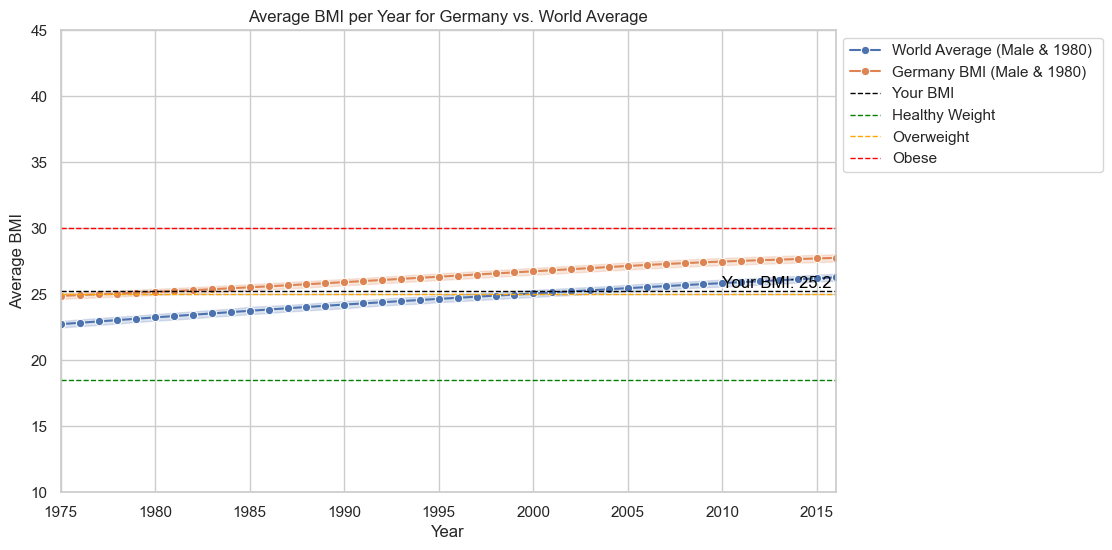

In [47]:
# Set Seaborn style
sns.set(style="whitegrid")

# Capture user input
valid_countries = set(df['country'].str.lower())
valid_sex = set(df["sex"].str.lower())
valid_age_groups = set(['75+', '65-74', '55-64', '45-54', '35-44', '25-34', '18-24'])

# Prompt user for input and validate the country
while True:
    user_country = input("Enter your country: ").lower()
    if user_country in valid_countries:
        break
    else:
        print("Invalid country name. Please enter a valid country.")

# Prompt user for input and validate the sex
while True:
    user_sex = input("Enter your sex (Female/Male): ").lower()
    if user_sex in valid_sex:
        break
    else:
        print("Invalid choice. Please enter a valid sex (Female/Male).")
        
# Prompt user for input and validate the age group
while True:
    try:
        user_year_of_birth = int(input("Enter your year of birth: "))
        user_age_group = determine_age_group(user_year_of_birth)
        if user_age_group in valid_age_groups:
            break
        else:
            print("Invalid choice. Please enter a valid year of birth.")
    except ValueError:
        print("Invalid input. Please enter a valid year.")
        
# Filter data for the selected sex
age_sex_data = df[(df['age_group'].str.lower() == user_age_group) & 
              (df['sex'].str.lower() == user_sex)]

country_age_sex_data = df[(df['country'].str.lower() == user_country) & 
              (df["age_group"] == user_age_group) &
              (df['sex'].str.lower() == user_sex)]

# Loading time
print("Calculating...")

# Capitalize user_country
user_country = user_country.capitalize()
user_sex = user_sex.capitalize()

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_sex_data, x='year', y='mean_body_mass_index', marker='o', label=f'World Average ({user_sex} & {user_year_of_birth}) ')
sns.lineplot(data=country_age_sex_data, x='year', y='mean_body_mass_index', marker='o', label=f'{user_country} BMI ({user_sex} & {user_year_of_birth})')

# Capture user input
user_height = float(input("Enter your height in cm: "))
user_weight = float(input("Enter your weight in kg: "))

# Calculate user's BMI
user_bmi = user_weight / ((user_height / 100) ** 2)

# Plot the user's BMI
plt.axhline(y=user_bmi, color='black', linestyle='--', linewidth=1, label="Your BMI")

# Add user's BMI as text above the line
plt.text(2010, user_bmi, f"Your BMI: {user_bmi:.1f}", color='black', va='bottom')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average BMI')
plt.title(f'Average BMI per Year for {user_country} vs. World Average')
plt.axis(xmin=1975, xmax=2016, ymin=10, ymax=45)

# Add a reference line along the x-axis
plt.axhline(y=18.5, color='green', linestyle='--', linewidth=1, label="Healthy Weight")
plt.axhline(y=25.0, color='orange', linestyle='--', linewidth=1, label="Overweight")
plt.axhline(y=30.0, color='red', linestyle='--', linewidth=1, label="Obese")

# Display the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

## Exploratory Data Analysis

I came up with a list of questions that I will explore using EDA.
* [Q1] What was this average BMI in 1975 vs 2016 ?
* [Q2] Which countries had the largest average BMI in 2016?
* [Q3] Which countries had the smallest average BMI in 2016?
* [Q4] Which regions had the largest average BMI in 2016?
* [Q5] Which age groups have the largest BMI in 2016? How does this compare to 1975?
* [Q6] Which sex had the highest BMI in 2016? How does this compare to 1975?
* [Q7] Which countries had the largest average BMI per region in 2016?
* [Q8] Which countries had the smallest average BMI per region in 2016?
* [Q9] What percentage of countries had an average "healthy BMI" of between 18.5-24.9 in 2016? Underweight? Overweight? Obese?
* [Q10] How do the results from 2016 differ from 1975?
* [Q11] Which countries experienced the largest change in average BMI from 1975-2016? The smallest change? Negative change?
* [Q12] Has the country with the largest BMI in 2016, the same as 1975? How has BMI changed from 1975-2016?
* [Q13] Has the country with the smallest BMI in 2016, the same as 1975? How has BMI changed from 1975-2016?
* [Q14] What might the average BMI per country be in 2040? Which countries might experience the largest change?

### Average BMI in 1975 vs 2016 ?

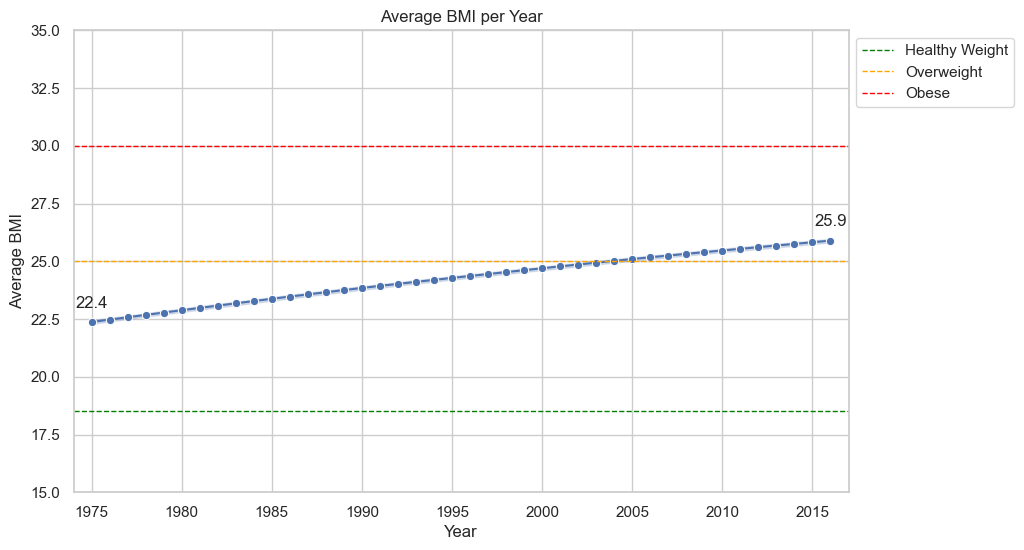

In [48]:
# [Q1] What was this average BMI in 1975 vs 2016 ?

# Set Seaborn style
sns.set(style="whitegrid")

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='mean_body_mass_index', marker='o')

# Get the Average BMI values for years 1975 and 2016
annotation_offset = 0.5  # Adjust this value to move the annotations higher
average_bmi_1975 = df[df['year'] == 1975]['mean_body_mass_index'].mean()
average_bmi_2016 = df[df['year'] == 2016]['mean_body_mass_index'].mean()
plt.text(1975, average_bmi_1975 + annotation_offset, f"{average_bmi_1975:.1f}", ha='center', va='bottom')
plt.text(2016, average_bmi_2016 + annotation_offset, f"{average_bmi_2016:.1f}", ha='center', va='bottom')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average BMI')
plt.title('Average BMI per Year')
plt.axis(xmin=1974,xmax=2017,ymin=15,ymax=35)

# Add a reference line along the x-axis
plt.axhline(y=18.5, color='green', linestyle='--', linewidth=1,label="Healthy Weight")
plt.axhline(y=25.0, color='orange', linestyle='--', linewidth=1,label="Overweight")
plt.axhline(y=30.0, color='red', linestyle='--', linewidth=1,label="Obese")

# Display the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

* In 1975 the average was 22.4. Forty one years later, this number has gone up to 25.9. A increase of 15.8%.
* 25.9 is classed as 'overweight' (25.0-29.9), meaning the average global population was overweight in 2016.
* In 2004 the average BMI goes from "healthy weight" to "overweight".

### Countries with the largest BMI?

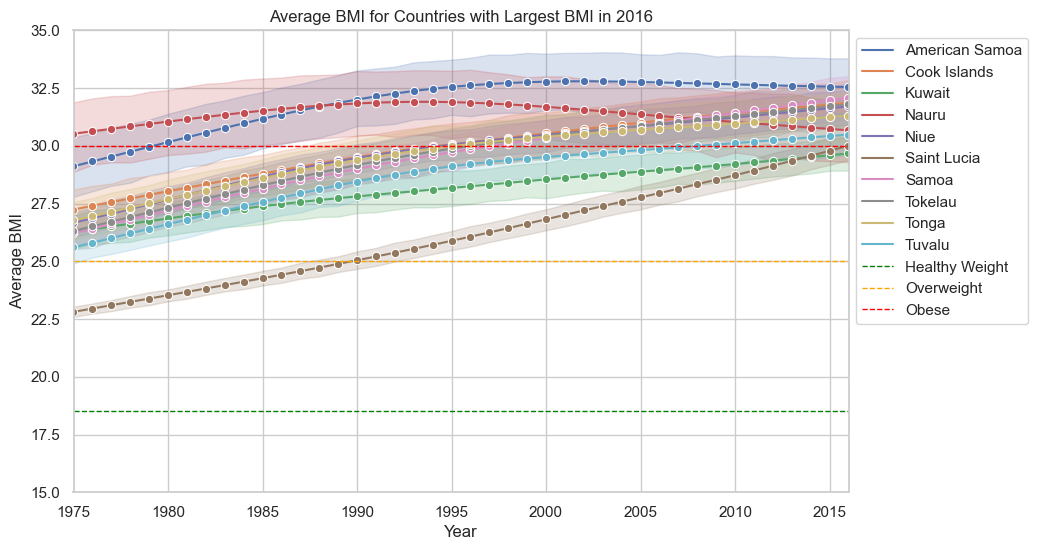

In [49]:
# [Q2] Which countries had the largest average BMI in 2016?

# Set Seaborn style
sns.set(style="whitegrid")

# Filter data for the year 2016
df_2016 = df[df['year'] == 2016]

# Find countries with largest average BMI in 2016
largest_bmi_countries_2016 = df_2016.groupby('country')['mean_body_mass_index'].mean().nlargest(10).index

# Create a line plot using Seaborn for the selected countries
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['country'].isin(largest_bmi_countries_2016)], x='year', y='mean_body_mass_index', hue='country', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average BMI')
plt.title('Average BMI for Countries with Largest BMI in 2016')
plt.axis(xmin=1975, xmax=2016, ymin=15, ymax=35)

# Add a reference line along the x-axis
plt.axhline(y=18.5, color='green', linestyle='--', linewidth=1, label="Healthy Weight")
plt.axhline(y=25.0, color='orange', linestyle='--', linewidth=1, label="Overweight")
plt.axhline(y=30.0, color='red', linestyle='--', linewidth=1, label="Obese")

# Display the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

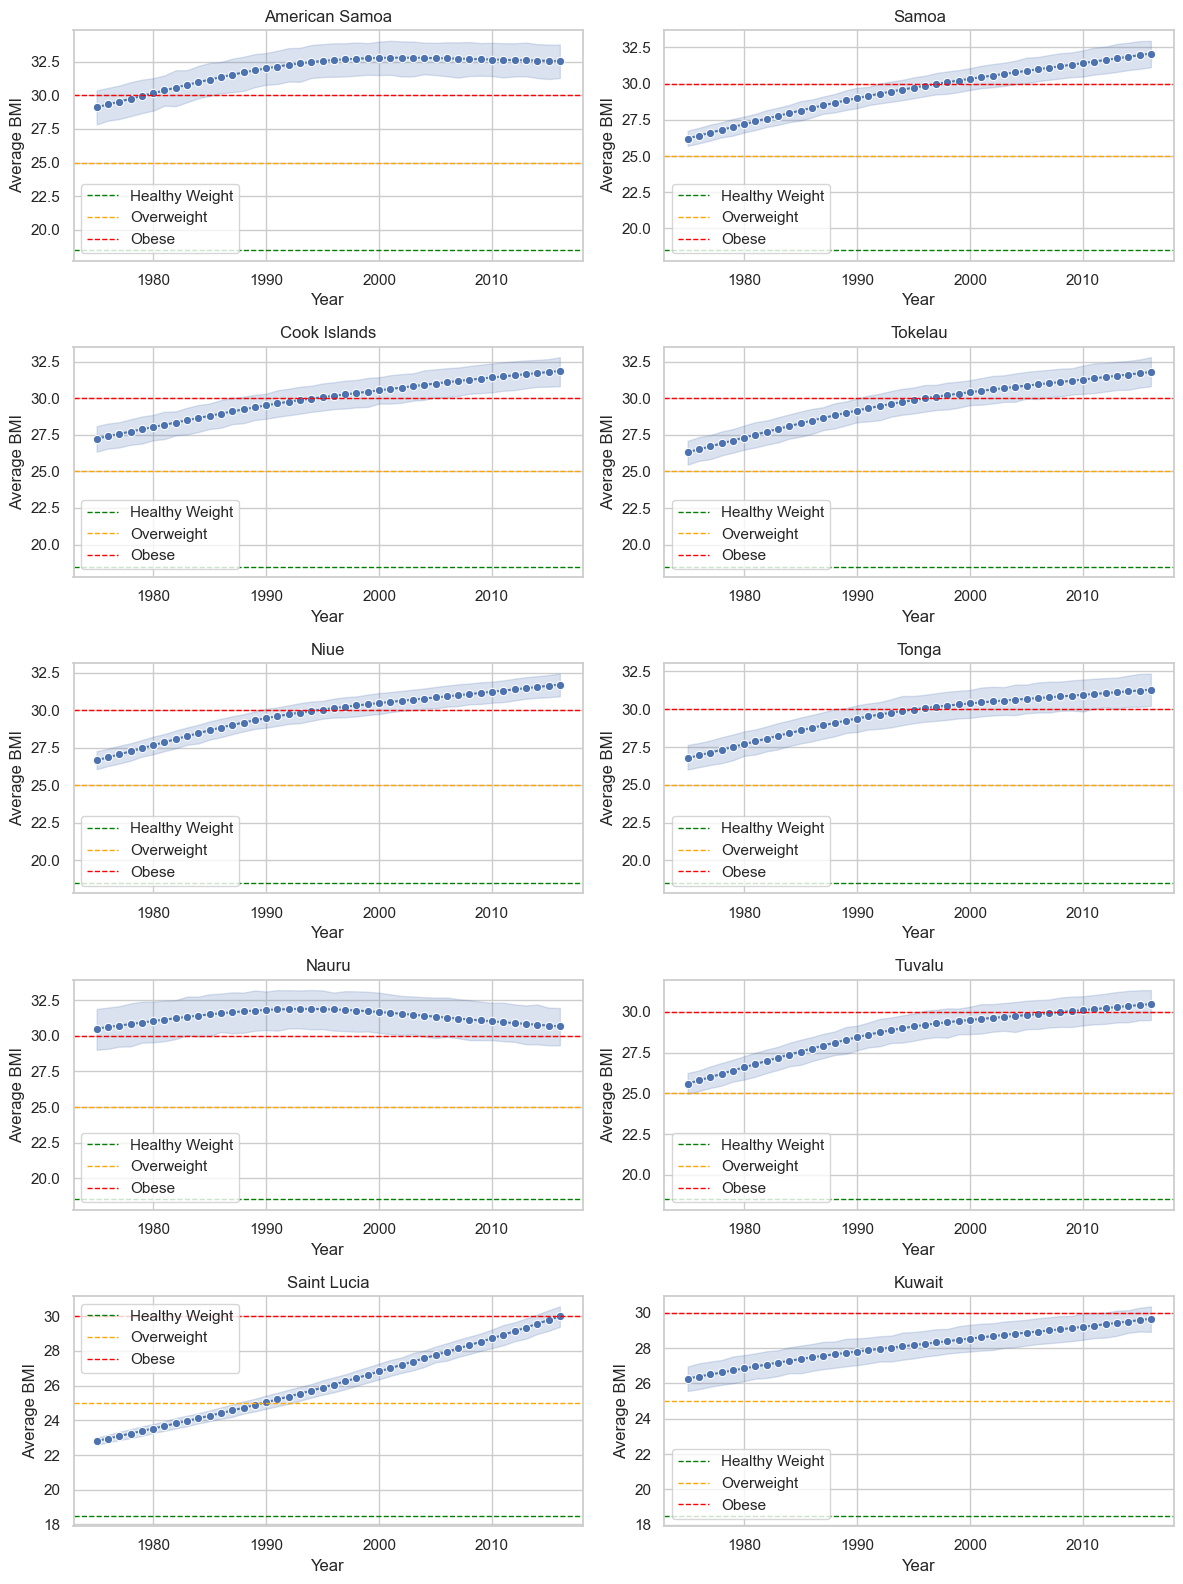

In [50]:
# Creating sub-plots so we can see the countries better

# Set Seaborn style
sns.set(style="whitegrid")

# Filter data for the year 2016
df_2016 = df[df['year'] == 2016]

# Find countries with largest average BMI in 2016
largest_bmi_countries_2016 = df_2016.groupby('country')['mean_body_mass_index'].mean().nlargest(10).index

# Create subplots for each country
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 16))
for i, country in enumerate(largest_bmi_countries_2016):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.lineplot(data=df[(df['country'] == country) & (df['year'] <= 2016)],
                 x='year', y='mean_body_mass_index', ax=ax, marker='o')
    ax.set_title(country)
    ax.set_xlabel('Year')
    ax.set_ylabel('Average BMI')
    ax.axhline(y=18.5, color='green', linestyle='--', linewidth=1, label="Healthy Weight")
    ax.axhline(y=25.0, color='orange', linestyle='--', linewidth=1, label="Overweight")
    ax.axhline(y=30.0, color='red', linestyle='--', linewidth=1, label="Obese")
    ax.legend()

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

In [51]:
# Displaying 2016 results in a table

# Filter data for the year 2016
df_2016 = df[df['year'] == 2016]

# Find countries with largest average BMI in 2016
largest_bmi_countries_2016 = df_2016.groupby('country')['mean_body_mass_index'].mean().nlargest(10).index

# Create a DataFrame to store the average BMI and region data
average_bmi_data = []
for country in largest_bmi_countries_2016:
    avg_bmi = df_2016[df_2016['country'] == country]['mean_body_mass_index'].mean()
    region = df_2016[df_2016['country'] == country]['region'].iloc[0]  # Assuming the region is the same for all years
    average_bmi_data.append([country, round(avg_bmi, 1), region])

# Create a tabular representation of the data
table = tabulate(average_bmi_data, headers=['Country', 'Average BMI', 'Region'], tablefmt='pretty')

# Print the table
print(table)


+----------------+-------------+---------------------------------+
|    Country     | Average BMI |             Region              |
+----------------+-------------+---------------------------------+
| American Samoa |    32.5     |             Pacific             |
|     Samoa      |    32.1     |             Pacific             |
|  Cook Islands  |    31.9     |             Pacific             |
|    Tokelau     |    31.8     |             Pacific             |
|      Niue      |    31.7     |             Pacific             |
|     Tonga      |    31.3     |             Pacific             |
|     Nauru      |    30.7     |             Pacific             |
|     Tuvalu     |    30.5     |             Pacific             |
|  Saint Lucia   |    30.0     | Latin America and the Caribbean |
|     Kuwait     |    29.7     |  Middle East and North Africa   |
+----------------+-------------+---------------------------------+


* In 2016, American Samoa had the largest average BMI with 32.5. This is classed as "Obese" (30.0 and above).
* All the other countries in the top 10 also have a BMI of over 30 and therefore are classed as "Obese", with the exception of Kuwait.
* The top 8 countries are all from the Pacific.

### Countries with the smallest BMI?

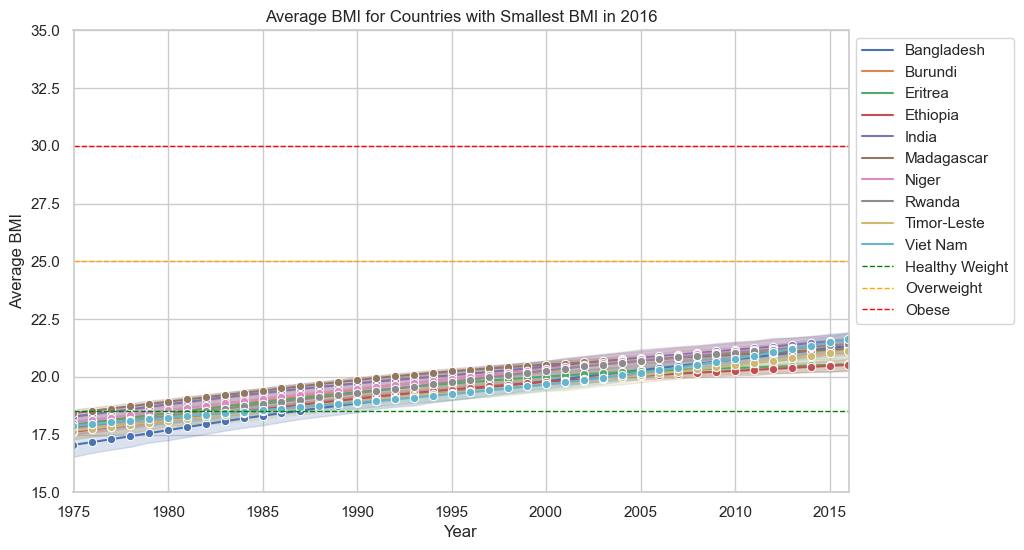

In [52]:
# [Q3] Which countries had the smallest average BMI in 2016?

# Set Seaborn style
sns.set(style="whitegrid")

# Filter data for the year 2016
df_2016 = df[df['year'] == 2016]

# Find countries with largest average BMI in 2016
smallest_bmi_countries_2016 = df_2016.groupby('country')['mean_body_mass_index'].mean().nsmallest(10).index

# Create a line plot using Seaborn for the selected countries
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['country'].isin(smallest_bmi_countries_2016)], x='year', y='mean_body_mass_index', hue='country', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average BMI')
plt.title('Average BMI for Countries with Smallest BMI in 2016')
plt.axis(xmin=1975, xmax=2016, ymin=15, ymax=35)

# Add a reference line along the x-axis
plt.axhline(y=18.5, color='green', linestyle='--', linewidth=1, label="Healthy Weight")
plt.axhline(y=25.0, color='orange', linestyle='--', linewidth=1, label="Overweight")
plt.axhline(y=30.0, color='red', linestyle='--', linewidth=1, label="Obese")

# Display the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

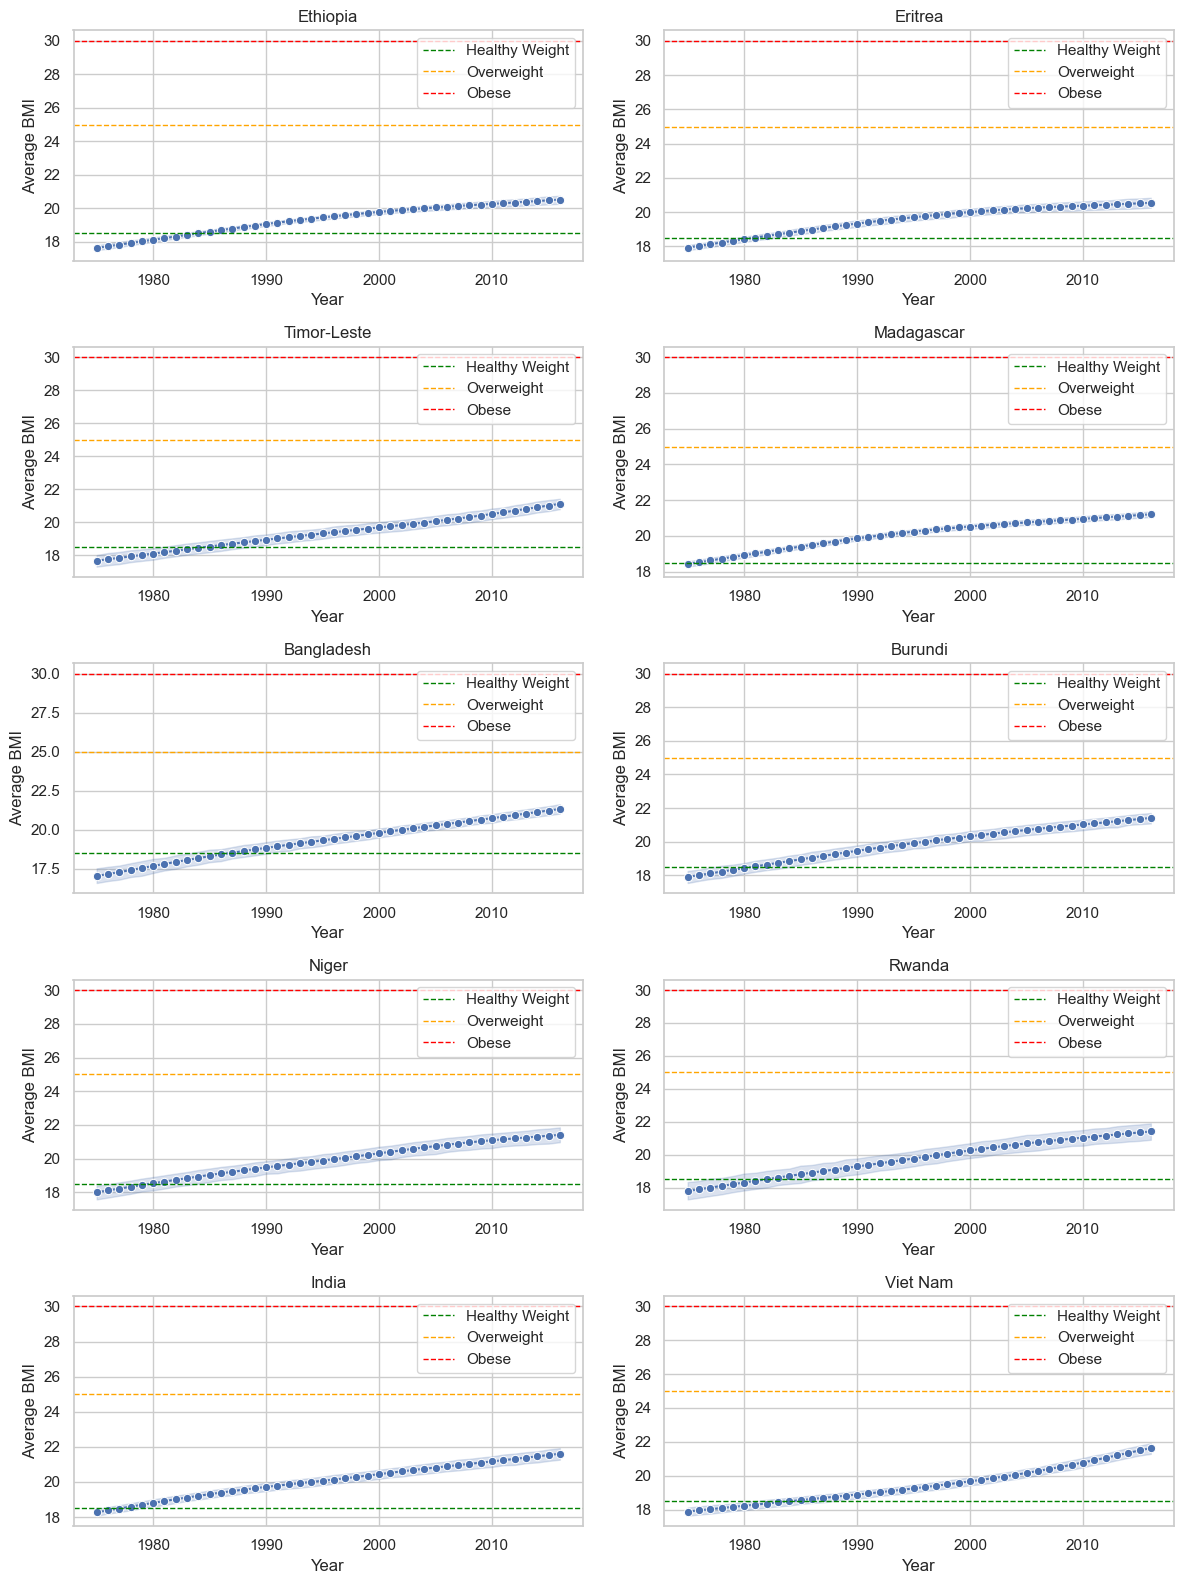

In [53]:
# Creating sub-plots so we can see the countries better

# Set Seaborn style
sns.set(style="whitegrid")

# Filter data for the year 2016
df_2016 = df[df['year'] == 2016]

# Find countries with largest average BMI in 2016
smallest_bmi_countries_2016 = df_2016.groupby('country')['mean_body_mass_index'].mean().nsmallest(10).index

# Create subplots for each country
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 16))
for i, country in enumerate(smallest_bmi_countries_2016):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.lineplot(data=df[(df['country'] == country) & (df['year'] <= 2016)],
                 x='year', y='mean_body_mass_index', ax=ax, marker='o')
    ax.set_title(country)
    ax.set_xlabel('Year')
    ax.set_ylabel('Average BMI')
    ax.axhline(y=18.5, color='green', linestyle='--', linewidth=1, label="Healthy Weight")
    ax.axhline(y=25.0, color='orange', linestyle='--', linewidth=1, label="Overweight")
    ax.axhline(y=30.0, color='red', linestyle='--', linewidth=1, label="Obese")
    ax.legend()

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

In [54]:
# Displaying 2016 results in a table

# Filter data for the year 2016
df_2016 = df[df['year'] == 2016]

# Find countries with largest average BMI in 2016
smallest_bmi_countries_2016 = df_2016.groupby('country')['mean_body_mass_index'].mean().nsmallest(10).index

# Create a DataFrame to store the average BMI and region data
average_bmi_data = []
for country in smallest_bmi_countries_2016:
    avg_bmi = df_2016[df_2016['country'] == country]['mean_body_mass_index'].mean()
    region = df_2016[df_2016['country'] == country]['region'].iloc[0]  # Assuming the region is the same for all years
    average_bmi_data.append([country, round(avg_bmi, 1), region])

# Create a tabular representation of the data
table = tabulate(average_bmi_data, headers=['Country', 'Average BMI', 'Region'], tablefmt='pretty')

# Print the table
print(table)

+-------------+-------------+--------------------+
|   Country   | Average BMI |       Region       |
+-------------+-------------+--------------------+
|  Ethiopia   |    20.5     | Sub-Saharan Africa |
|   Eritrea   |    20.5     | Sub-Saharan Africa |
| Timor-Leste |    21.1     |        Asia        |
| Madagascar  |    21.2     | Sub-Saharan Africa |
| Bangladesh  |    21.3     |        Asia        |
|   Burundi   |    21.4     | Sub-Saharan Africa |
|    Niger    |    21.4     | Sub-Saharan Africa |
|   Rwanda    |    21.4     | Sub-Saharan Africa |
|    India    |    21.6     |        Asia        |
|  Viet Nam   |    21.6     |        Asia        |
+-------------+-------------+--------------------+


* Both Eritrea and Ethiopia had the smallest average BMI in 2016 with 20.5. This is classed as "Healthy Weight" (18.5-24.9).
* The countries with the s average BMI are all from either Sub-Saharan Africa or Asia 

### Regions with the largest BMI?

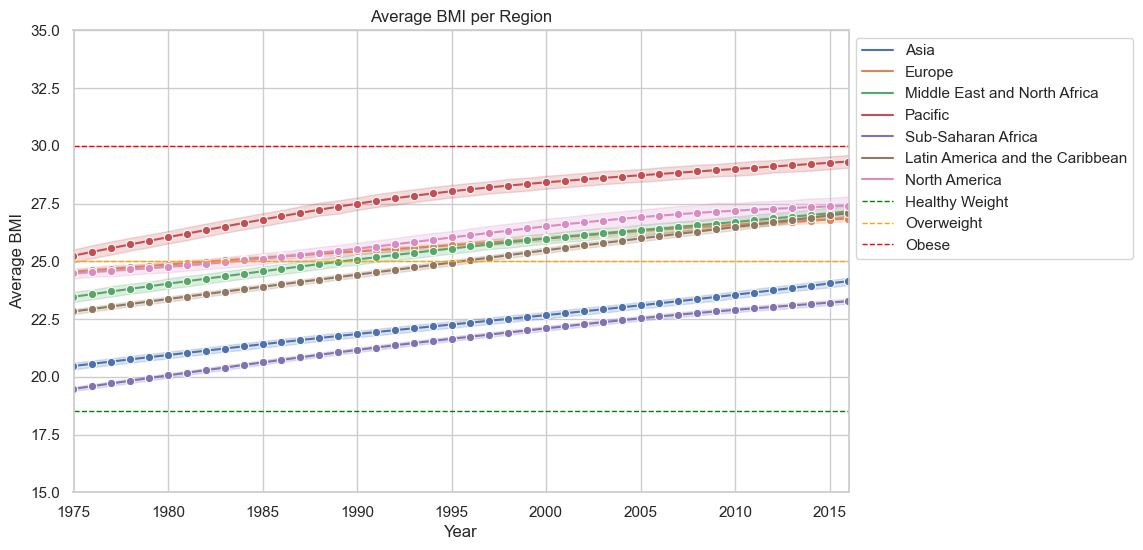

In [55]:
# [Q4] Which regions had the largest average BMI in 2016?

# Set Seaborn style
sns.set(style="whitegrid")

# Filter data for the year 2016
df_2016 = df[df['year'] == 2016]

# Find countries with largest average BMI in 2016
bmi_region_2016 = df_2016.groupby('region')['mean_body_mass_index'].mean().index

# Create a line plot using Seaborn for the selected countries
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['region'].isin(bmi_region_2016)], x='year', y='mean_body_mass_index', hue='region', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average BMI')
plt.title('Average BMI per Region')
plt.axis(xmin=1975, xmax=2016, ymin=15, ymax=35)

# Add a reference line along the x-axis
plt.axhline(y=18.5, color='green', linestyle='--', linewidth=1, label="Healthy Weight")
plt.axhline(y=25.0, color='orange', linestyle='--', linewidth=1, label="Overweight")
plt.axhline(y=30.0, color='red', linestyle='--', linewidth=1, label="Obese")

# Display the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

In [56]:
# Displaying 2016 results in a table

# Filter data for the year 2016
df_2016 = df[df['year'] == 2016]

# Find countries with largest average BMI in 2016
bmi_region_2016 = df_2016.groupby('region')['mean_body_mass_index'].mean().nlargest(7).index

# Create a DataFrame to store the average BMI and region data
average_bmi_data = []
for region in bmi_region_2016:
    avg_bmi = df_2016[df_2016['region'] == region]['mean_body_mass_index'].mean()
    average_bmi_data.append([region, round(avg_bmi, 1)])

# Create a tabular representation of the data
table = tabulate(average_bmi_data, headers=['Region', 'Average BMI'], tablefmt='pretty')

# Print the table
print(table)

+---------------------------------+-------------+
|             Region              | Average BMI |
+---------------------------------+-------------+
|             Pacific             |    29.3     |
|          North America          |    27.4     |
|  Middle East and North Africa   |    27.2     |
| Latin America and the Caribbean |    27.1     |
|             Europe              |    26.8     |
|              Asia               |    24.1     |
|       Sub-Saharan Africa        |    23.3     |
+---------------------------------+-------------+


* The Pacific had the largest average BMI in 2016 of 29.3. This is just shy from "Obese" (30.0 and above).
* North America is second with 27.4 and Middle East and Norht Africa is third with 27.2.
* Sub-Saharan Africa has the smallest average of 23.3

### BMI by age group?

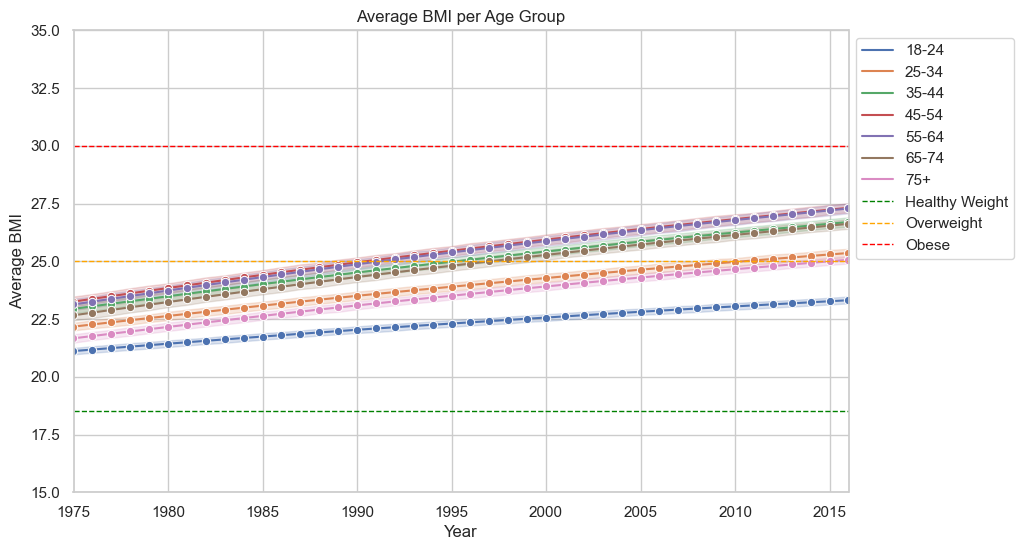

In [57]:
# [Q5] Which age groups have the largest BMI in 2016? How does this compare to 1975?

# Set Seaborn style
sns.set(style="whitegrid")

# Filter data for the year 2016
df_2016 = df[df['year'] == 2016]

# Find countries with largest average BMI in 2016
bmi_age_2016 = df_2016.groupby('age_group')['mean_body_mass_index'].mean().index

# Create a line plot using Seaborn for the selected countries
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['age_group'].isin(bmi_age_2016)], x='year', y='mean_body_mass_index', hue='age_group', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average BMI')
plt.title('Average BMI per Age Group')
plt.axis(xmin=1975, xmax=2016, ymin=15, ymax=35)

# Add a reference line along the x-axis
plt.axhline(y=18.5, color='green', linestyle='--', linewidth=1, label="Healthy Weight")
plt.axhline(y=25.0, color='orange', linestyle='--', linewidth=1, label="Overweight")
plt.axhline(y=30.0, color='red', linestyle='--', linewidth=1, label="Obese")

# Display the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

In [58]:
# Comparing 1975 & 2016 results in a table

# Filter data for the year 1975 & 2016
df_1975 = df[df['year'] == 1975]
df_2016 = df[df['year'] == 2016]

# Find age groups with largest average BMI in 2016
bmi_age_1975 = df_1975.groupby('age_group')['mean_body_mass_index'].mean().nlargest(7).index
bmi_age_2016 = df_2016.groupby('age_group')['mean_body_mass_index'].mean().nlargest(7).index

# Create a DataFrame to store the average BMI data for both years
average_bmi_data = []
for age_group in bmi_age_2016:
    avg_bmi_1975 = df_1975[df_1975['age_group'] == age_group]['mean_body_mass_index'].mean()
    avg_bmi_2016 = df_2016[df_2016['age_group'] == age_group]['mean_body_mass_index'].mean()
    difference = avg_bmi_2016 - avg_bmi_1975
    average_bmi_data.append([age_group, round(avg_bmi_1975, 2), round(avg_bmi_2016, 2), round(difference, 2)])

# Create a tabular representation of the data
table = tabulate(average_bmi_data, headers=['Age Group', 'Average BMI 1975', 'Average BMI 2016', 'Difference'], tablefmt='pretty')

# Print the table
print(table)

+-----------+------------------+------------------+------------+
| Age Group | Average BMI 1975 | Average BMI 2016 | Difference |
+-----------+------------------+------------------+------------+
|   45-54   |      23.25       |      27.31       |    4.06    |
|   55-64   |      23.13       |      27.29       |    4.16    |
|   35-44   |      22.94       |       26.7       |    3.76    |
|   65-74   |      22.66       |      26.62       |    3.96    |
|   25-34   |      22.17       |      25.36       |    3.19    |
|    75+    |      21.66       |      25.07       |    3.4     |
|   18-24   |      21.11       |      23.31       |    2.2     |
+-----------+------------------+------------------+------------+


* In 2016, age group 45-54 had the largest average BMI of 27.31.
* Follwed by 55-64 year olds with an average of 27.29.
* The average BMI has increased for all age groups between 1975 and 2016. The biggest difference for age_group 55-64 which has gone up from 23.13 to 27.29.
* Followed by 45-54 which has gone up from 23.25 to 27.31.
* Age's 18-24 have seen to smallest change. From 21.11 to 23.31. 

### BMI by sex?

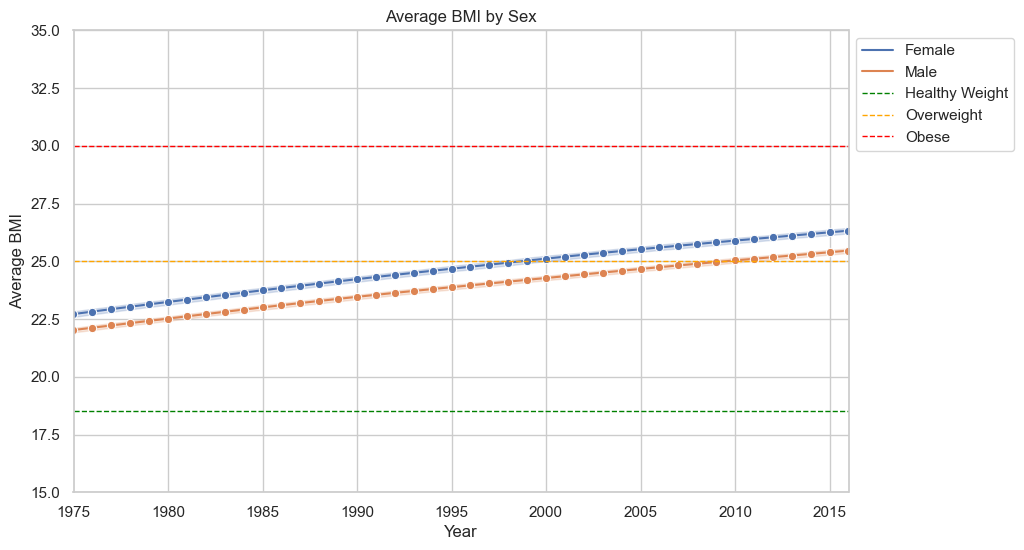

In [59]:
# [Q6] Which sex had the highest BMI in 2016? How does this compare to 1975?

# Set Seaborn style
sns.set(style="whitegrid")

# Filter data for the year 2016
df_2016 = df[df['year'] == 2016]

# Find countries with largest average BMI in 2016
bmi_sex_2016 = df_2016.groupby('sex')['mean_body_mass_index'].mean().index

# Create a line plot using Seaborn for the selected countries
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['sex'].isin(bmi_sex_2016)], x='year', y='mean_body_mass_index', hue='sex', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average BMI')
plt.title('Average BMI by Sex')
plt.axis(xmin=1975, xmax=2016, ymin=15, ymax=35)

# Add a reference line along the x-axis
plt.axhline(y=18.5, color='green', linestyle='--', linewidth=1, label="Healthy Weight")
plt.axhline(y=25.0, color='orange', linestyle='--', linewidth=1, label="Overweight")
plt.axhline(y=30.0, color='red', linestyle='--', linewidth=1, label="Obese")

# Display the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

In [60]:
# Comparing 1975 & 2016 results in a table

# Filter data for the year 1975 & 2016
df_1975 = df[df['year'] == 1975]
df_2016 = df[df['year'] == 2016]

# Find age groups with largest average BMI in 2016
bmi_sex_1975 = df_1975.groupby('sex')['mean_body_mass_index'].mean().nlargest().index
bmi_sex_2016 = df_2016.groupby('sex')['mean_body_mass_index'].mean().nlargest().index

# Create a DataFrame to store the average BMI data for both years
average_bmi_data = []
for sex in bmi_sex_2016:
    avg_bmi_1975 = df_1975[df_1975['sex'] == sex]['mean_body_mass_index'].mean()
    avg_bmi_2016 = df_2016[df_2016['sex'] == sex]['mean_body_mass_index'].mean()
    difference = avg_bmi_2016 - avg_bmi_1975
    average_bmi_data.append([sex, round(avg_bmi_1975, 2), round(avg_bmi_2016, 2), round(difference, 2)])

# Create a tabular representation of the data
table = tabulate(average_bmi_data, headers=['Sex', 'Average BMI 1975', 'Average BMI 2016', 'Difference'], tablefmt='pretty')

# Print the table
print(table)

+--------+------------------+------------------+------------+
|  Sex   | Average BMI 1975 | Average BMI 2016 | Difference |
+--------+------------------+------------------+------------+
| Female |      22.71       |      26.32       |    3.61    |
|  Male  |      22.02       |      25.46       |    3.44    |
+--------+------------------+------------------+------------+


* In 2016, the average BMI of females was 26.32 compared to 25.46 for men. Slightly higher.
* Females have also seen the biggest change between 1975 and 2016. Going up from 22.71 to 26.32.

### Largest countries by region?

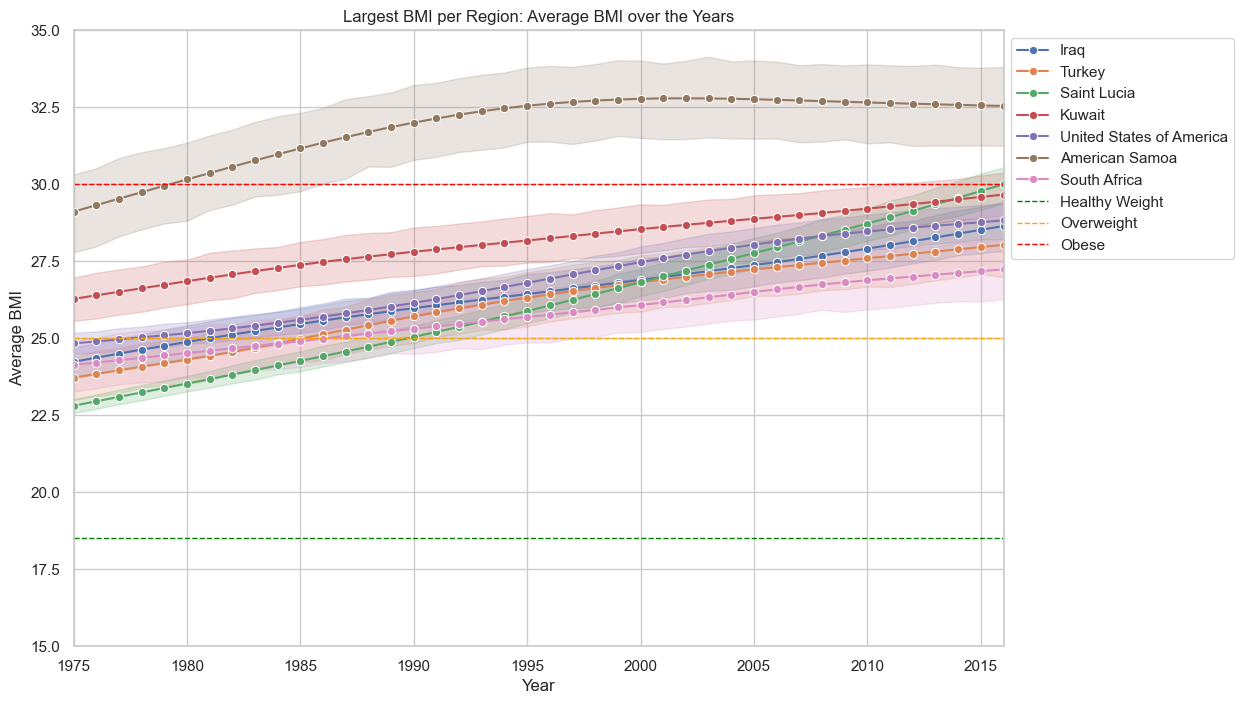

In [61]:
# [Q7] Which countries had the largest average BMI per region in 2016?

# Filter data for the year 2016
df_2016 = df[df['year'] == 2016]

# Calculate the average BMI per country and region for 2016
average_bmi_2016 = df_2016.groupby(['region', 'country'])['mean_body_mass_index'].mean().reset_index()

# Find the top country per region
top_country_per_region = average_bmi_2016.groupby('region').apply(lambda x: x.nlargest(1, 'mean_body_mass_index')).reset_index(drop=True)

# Create line plots for the top country per region using Seaborn
plt.figure(figsize=(12, 8))

for index, row in top_country_per_region.iterrows():
    country_data = df[(df['region'] == row['region']) & (df['country'] == row['country'])]
    sns.lineplot(data=country_data, x='year', y='mean_body_mass_index', label=row['country'], marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average BMI')
plt.title('Largest BMI per Region: Average BMI over the Years')
plt.axis(xmin=1975, xmax=2016, ymin=15, ymax=35)

# Add a reference line along the x-axis
plt.axhline(y=18.5, color='green', linestyle='--', linewidth=1, label="Healthy Weight")
plt.axhline(y=25.0, color='orange', linestyle='--', linewidth=1, label="Overweight")
plt.axhline(y=30.0, color='red', linestyle='--', linewidth=1, label="Obese")

# Display the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

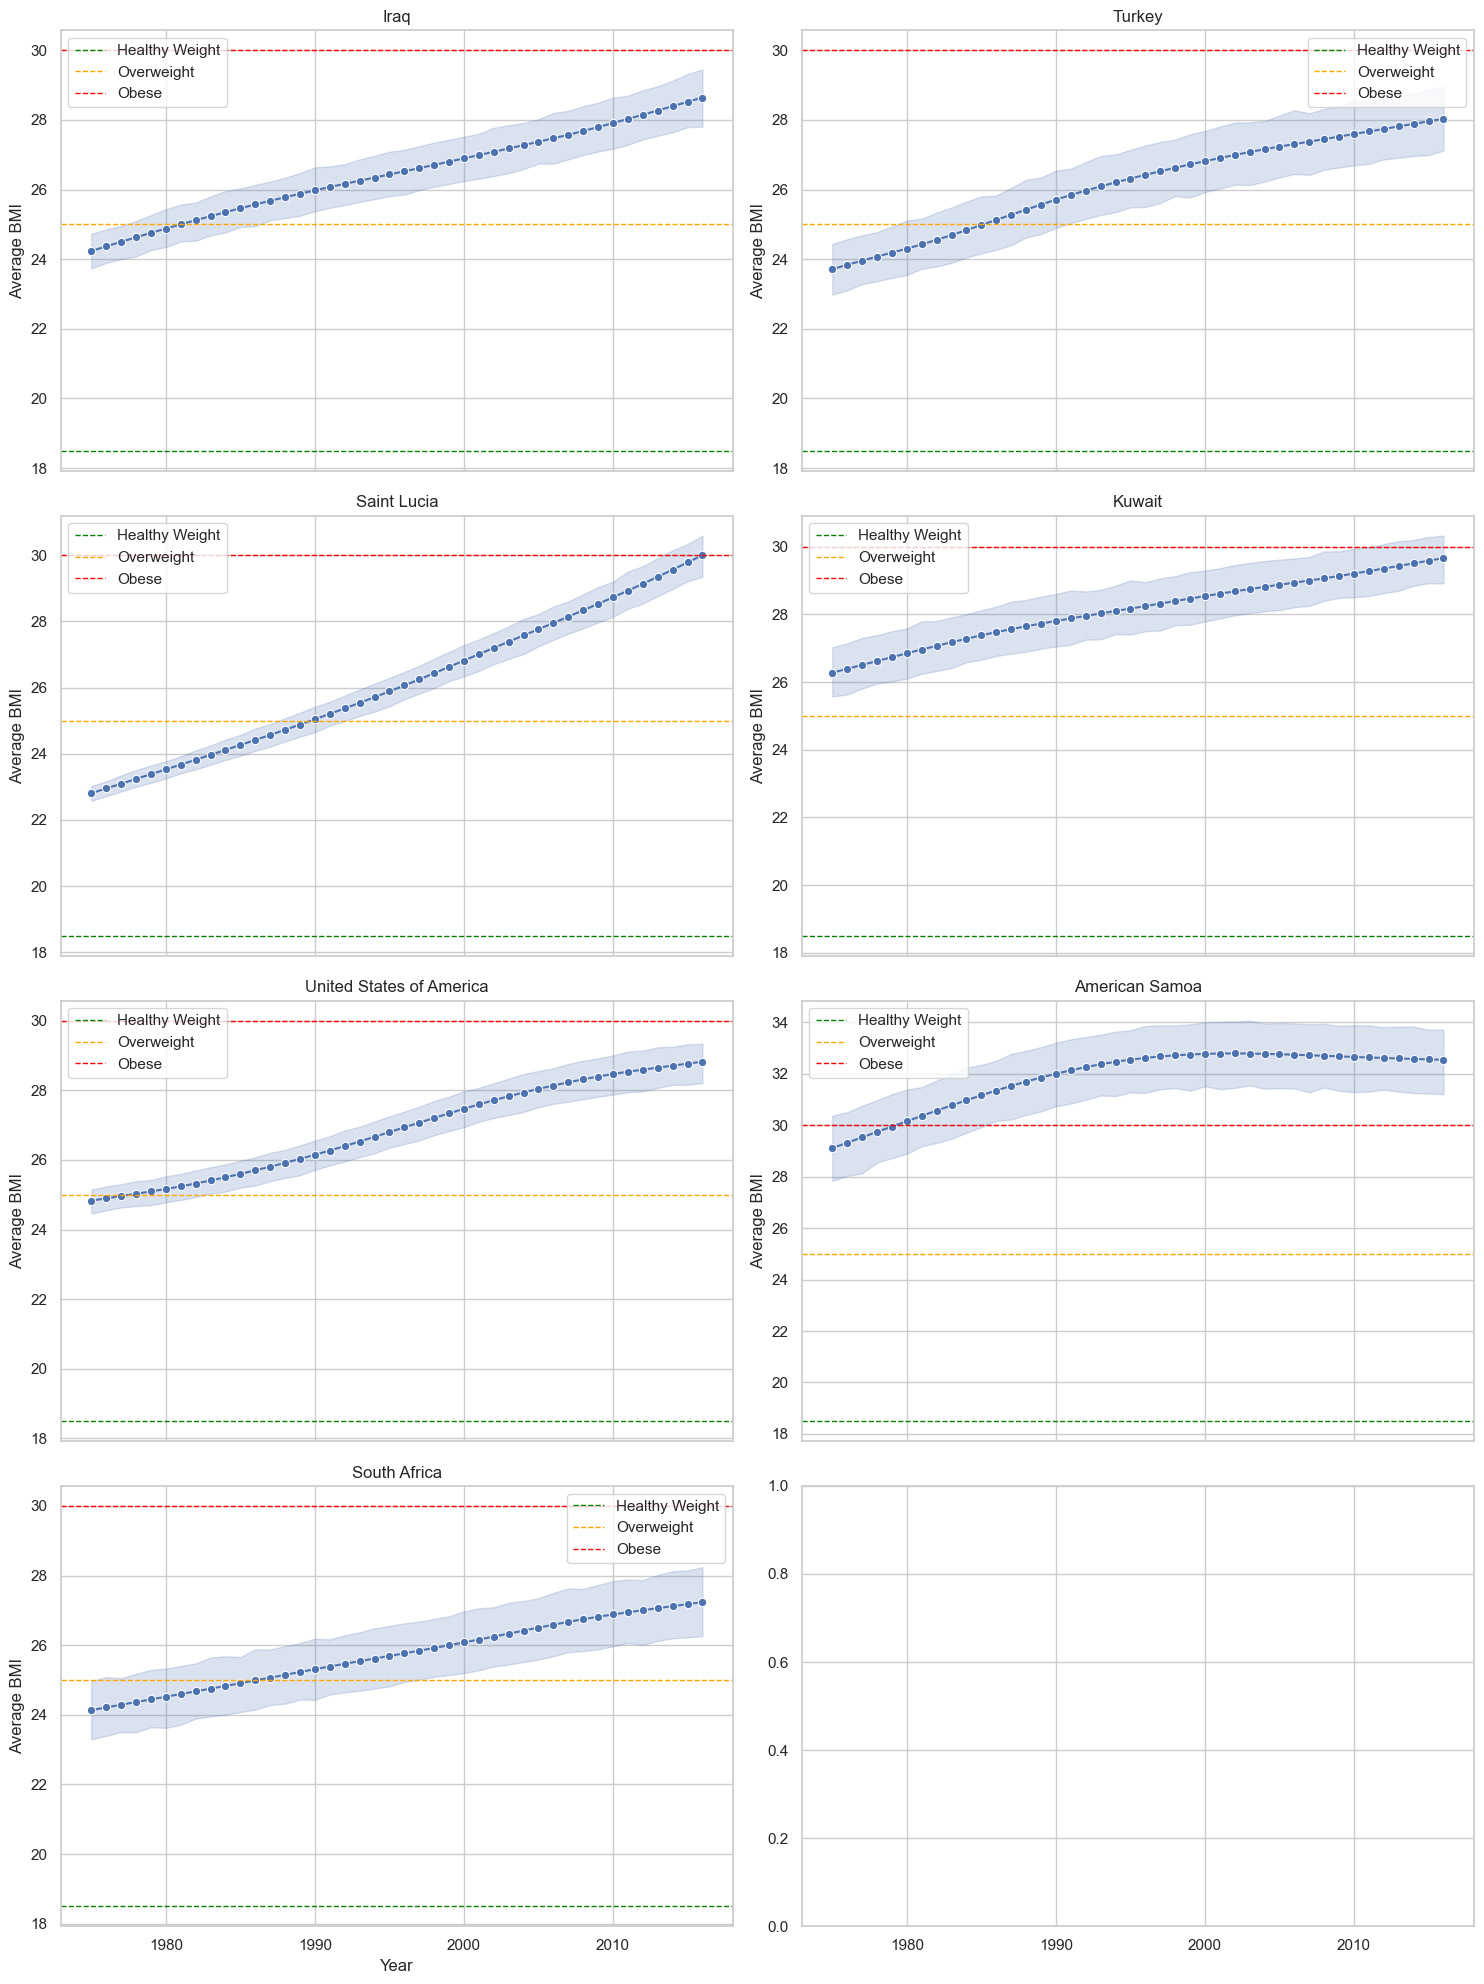

In [62]:
# Creating sub-plots so we can see the countries better

# Filter data for the year 2016
df_2016 = df[df['year'] == 2016]

# Calculate the average BMI per country and region for 2016
average_bmi_2016 = df_2016.groupby(['region', 'country'])['mean_body_mass_index'].mean().reset_index()

# Find the top country per region
top_country_per_region = average_bmi_2016.groupby('region').apply(lambda x: x.nlargest(1, 'mean_body_mass_index')).reset_index(drop=True)

# Create subplots for each country using Seaborn
num_plots = len(top_country_per_region)
num_cols = 2  # Number of columns in the subplot grid
num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), sharex=True)

for ax, (index, row) in zip(axes.flat, top_country_per_region.iterrows()):
    country_data = df[(df['region'] == row['region']) & (df['country'] == row['country'])]
    sns.lineplot(data=country_data, x='year', y='mean_body_mass_index', ax=ax, marker='o')
    ax.set_title(row['country'])
    ax.set_xlabel('Year')
    ax.set_ylabel('Average BMI')
    ax.axhline(y=18.5, color='green', linestyle='--', linewidth=1, label="Healthy Weight")
    ax.axhline(y=25.0, color='orange', linestyle='--', linewidth=1, label="Overweight")
    ax.axhline(y=30.0, color='red', linestyle='--', linewidth=1, label="Obese")
    ax.legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [63]:
# Comparing results in a table

# Filter data for the year 2016
df_2016 = df[df['year'] == 2016]

# Calculate the average BMI per country and region for 2016
average_bmi_2016 = df_2016.groupby(['region', 'country'])['mean_body_mass_index'].mean().reset_index()

# Find the maximum average BMI per region
max_bmi_per_region = average_bmi_2016.groupby('region')['mean_body_mass_index'].max().reset_index()

# Merge to get the countries with the maximum average BMI per region
countries_with_max_bmi = pd.merge(round(max_bmi_per_region,1), round(average_bmi_2016,1), on=['region', 'mean_body_mass_index'])

# Select relevant columns and sort
result = countries_with_max_bmi[['country', 'region', 'mean_body_mass_index']].sort_values(by='mean_body_mass_index', ascending=False)

# Convert the result to a tabular format
table = tabulate(result, headers='keys', tablefmt='pretty')

# Print the tabular representation
print(table)

+---+--------------------------+---------------------------------+----------------------+
|   |         country          |             region              | mean_body_mass_index |
+---+--------------------------+---------------------------------+----------------------+
| 6 |      American Samoa      |             Pacific             |         32.5         |
| 3 |       Saint Lucia        | Latin America and the Caribbean |         30.0         |
| 4 |          Kuwait          |  Middle East and North Africa   |         29.7         |
| 5 | United States of America |          North America          |         28.8         |
| 0 |           Iraq           |              Asia               |         28.6         |
| 1 |      Czech Republic      |             Europe              |         28.0         |
| 2 |          Turkey          |             Europe              |         28.0         |
| 7 |       South Africa       |       Sub-Saharan Africa        |         27.2         |
+---+-----

* The countries with the largest BMI per region are American Samoa for the Pacific with an average of 32.5
* Saint Lucia for Latin America and the Caribbean with an average of 30.0
* Kuwait for Middle East and North Africa with an average of 29.7
* United States of America for North America with an average of 28.8
* Iraq for Asia with an average of 28.6
* Czech Republic and Turkey for Europe with an average of 28.0
* South Africa for Sub-Saharan Africa with an average of 27.2 

### Smallest countries by region?

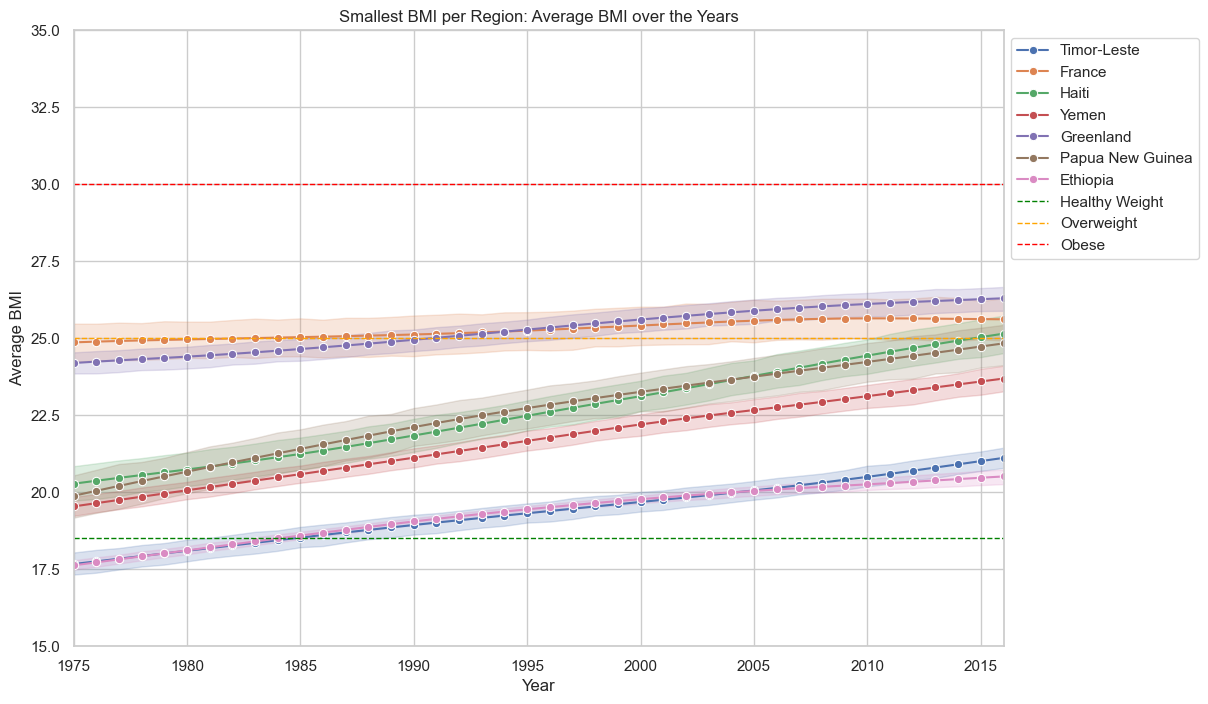

In [64]:
# [Q8] Which countries had the smallest average BMI per region in 2016?

# Filter data for the year 2016
df_2016 = df[df['year'] == 2016]

# Calculate the average BMI per country and region for 2016
average_bmi_2016 = df_2016.groupby(['region', 'country'])['mean_body_mass_index'].mean().reset_index()

# Find the top country per region
smallest_country_per_region = average_bmi_2016.groupby('region').apply(lambda x: x.nsmallest(1, 'mean_body_mass_index')).reset_index(drop=True)

# Create line plots for the top country per region using Seaborn
plt.figure(figsize=(12, 8))

for index, row in smallest_country_per_region.iterrows():
    country_data = df[(df['region'] == row['region']) & (df['country'] == row['country'])]
    sns.lineplot(data=country_data, x='year', y='mean_body_mass_index', label=row['country'], marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average BMI')
plt.title('Smallest BMI per Region: Average BMI over the Years')
plt.axis(xmin=1975, xmax=2016, ymin=15, ymax=35)

# Add a reference line along the x-axis
plt.axhline(y=18.5, color='green', linestyle='--', linewidth=1, label="Healthy Weight")
plt.axhline(y=25.0, color='orange', linestyle='--', linewidth=1, label="Overweight")
plt.axhline(y=30.0, color='red', linestyle='--', linewidth=1, label="Obese")

# Display the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

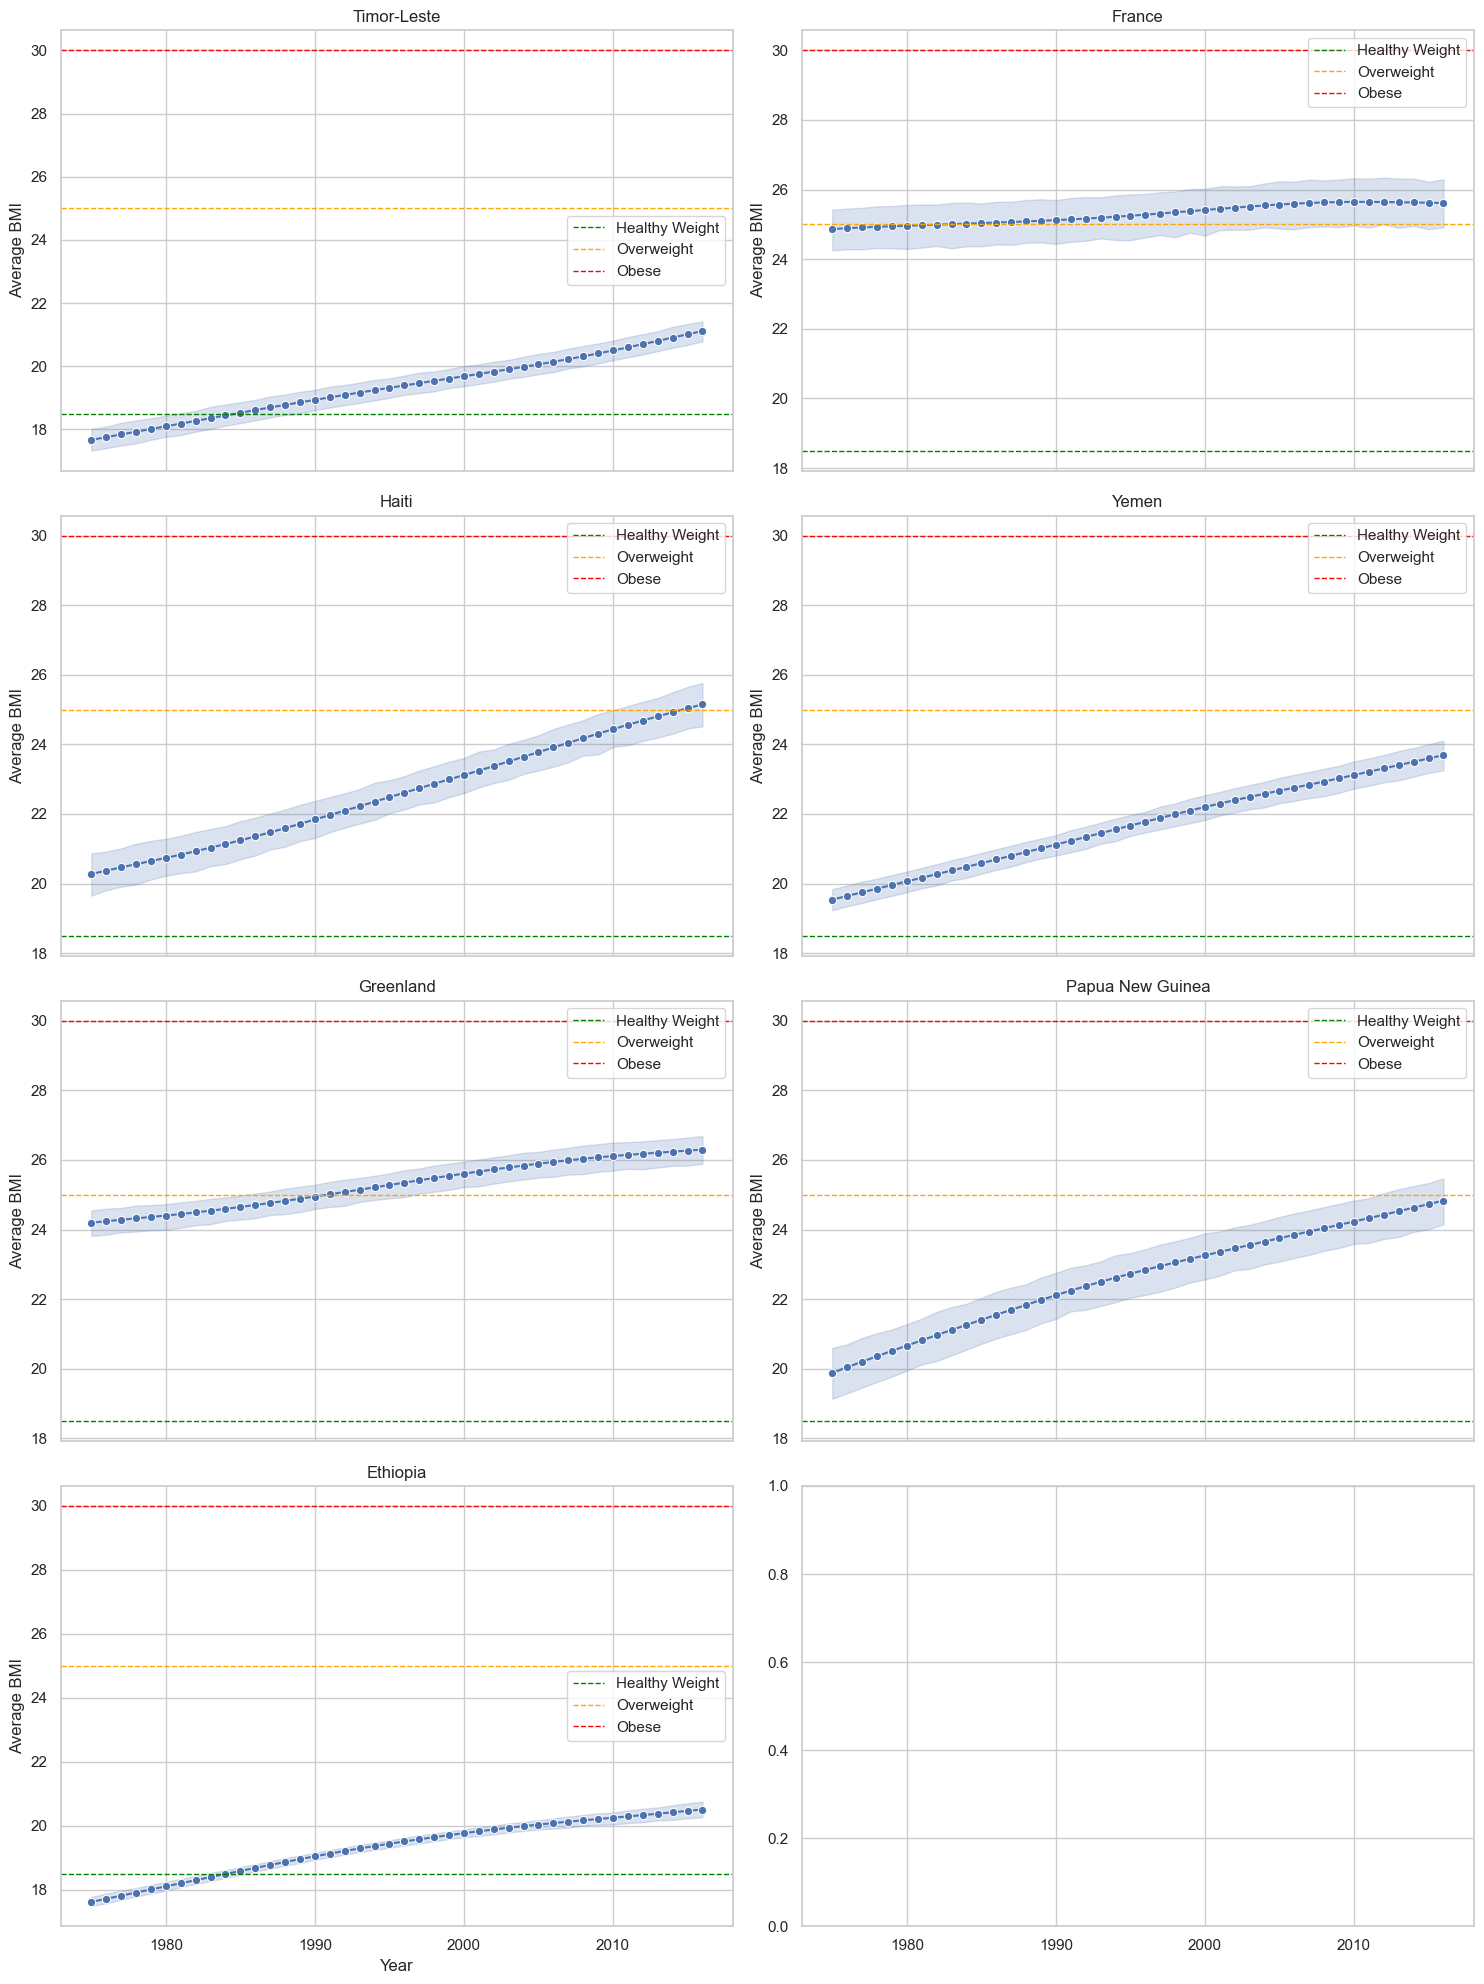

In [65]:
# Creating sub-plots so we can see the countries better

# Filter data for the year 2016
df_2016 = df[df['year'] == 2016]

# Calculate the average BMI per country and region for 2016
average_bmi_2016 = df_2016.groupby(['region', 'country'])['mean_body_mass_index'].mean().reset_index()

# Find the top country per region
smallest_country_per_region = average_bmi_2016.groupby('region').apply(lambda x: x.nsmallest(1, 'mean_body_mass_index')).reset_index(drop=True)

# Create subplots for each country using Seaborn
num_plots = len(smallest_country_per_region)
num_cols = 2  # Number of columns in the subplot grid
num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), sharex=True)

for ax, (index, row) in zip(axes.flat, smallest_country_per_region.iterrows()):
    country_data = df[(df['region'] == row['region']) & (df['country'] == row['country'])]
    sns.lineplot(data=country_data, x='year', y='mean_body_mass_index', ax=ax, marker='o')
    ax.set_title(row['country'])
    ax.set_xlabel('Year')
    ax.set_ylabel('Average BMI')
    ax.axhline(y=18.5, color='green', linestyle='--', linewidth=1, label="Healthy Weight")
    ax.axhline(y=25.0, color='orange', linestyle='--', linewidth=1, label="Overweight")
    ax.axhline(y=30.0, color='red', linestyle='--', linewidth=1, label="Obese")
    ax.legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [66]:
# Comparing results in a table

# Filter data for the year 2016
df_2016 = df[df['year'] == 2016]

# Calculate the average BMI per country and region for 2016
average_bmi_2016 = df_2016.groupby(['region', 'country'])['mean_body_mass_index'].mean().reset_index()

# Find the maximum average BMI per region
min_bmi_per_region = average_bmi_2016.groupby('region')['mean_body_mass_index'].min().reset_index()

# Merge to get the countries with the maximum average BMI per region
countries_with_min_bmi = pd.merge(round(min_bmi_per_region,1), round(average_bmi_2016,1), on=['region', 'mean_body_mass_index'])

# Select relevant columns and sort
result = countries_with_min_bmi[['country', 'region', 'mean_body_mass_index']].sort_values(by='mean_body_mass_index', ascending=True)

# Convert the result to a tabular format
table = tabulate(result, headers='keys', tablefmt='pretty')

# Print the tabular representation
print(table)

+---+------------------+---------------------------------+----------------------+
|   |     country      |             region              | mean_body_mass_index |
+---+------------------+---------------------------------+----------------------+
| 7 |     Eritrea      |       Sub-Saharan Africa        |         20.5         |
| 8 |     Ethiopia     |       Sub-Saharan Africa        |         20.5         |
| 0 |   Timor-Leste    |              Asia               |         21.1         |
| 4 |      Yemen       |  Middle East and North Africa   |         23.7         |
| 6 | Papua New Guinea |             Pacific             |         24.8         |
| 3 |      Haiti       | Latin America and the Caribbean |         25.1         |
| 1 |     Denmark      |             Europe              |         25.6         |
| 2 |      France      |             Europe              |         25.6         |
| 5 |    Greenland     |          North America          |         26.3         |
+---+-----------

* The countries with the smallest BMI per region are Eritrea and Ethiopia for Sub-Saharan Africa with an average of 20.5
* Timor-Leste for Asia with an average of 21.1
* Yemen for Middle East and North Africa with an average of 23.7
* Papua New Guinea for Pacific with an average of 28.8
* Haiti for Latin America and the Caribbean with an average of 25.1
* Denmark and France for Europe with an average of 25.6
* Greenland for North America with an average of 26.3 

In [67]:
# FUNCTION TO CREATE LABELED BARPLOT
def labeled_barplot(data, labels, perc=False):
    plt.figure(figsize=(8, 5))
    plt.xticks(rotation=0, fontsize=12)
    ax = sns.barplot(x=labels, y=data, palette="Paired")

    if perc:
        for p, label in zip(ax.patches, data):
            label_text = "{:.1f}%".format(label)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(label_text, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")

    plt.show()

### % of countries with "healthy BMI"?

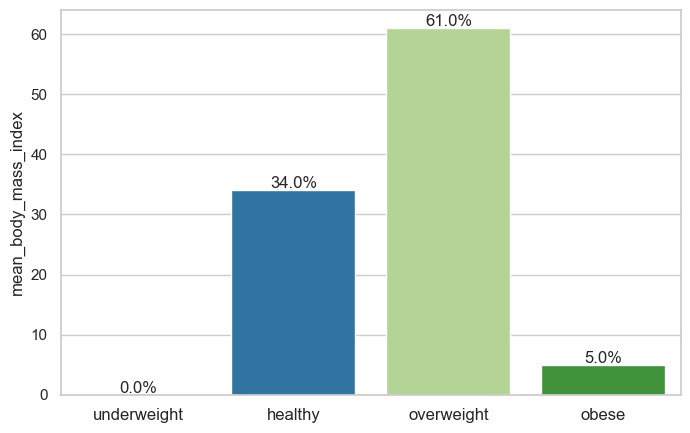

In [68]:
# [Q9] What percentage of countries had an average "healthy BMI" of between 18.5-24.9 in 2016? Underweight? Overweight? Obese?

# Filter data for the year 2016
df_2016 = df[df['year'] == 2016]

# Calculate average BMI for each country
avg_bmi_per_country = df_2016.groupby('country')['mean_body_mass_index'].mean()

# Define categories based on BMI ranges
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "underweight"
    elif bmi >= 18.5 and bmi <= 24.9:
        return "healthy"
    elif bmi >= 25.0 and bmi <= 29.9:
        return "overweight"
    else:
        return "obese"

# Apply BMI categorization to each country's average BMI
avg_bmi_per_country = avg_bmi_per_country.apply(categorize_bmi)

# Calculate counts of each BMI category for total number of countries
total_countries = len(avg_bmi_per_country)
bmi_counts = avg_bmi_per_country.value_counts()

# Calculate percentages
bmi_percentages = (bmi_counts / total_countries) * 100

# Include "underweight" category with 0 count and percentage
bmi_labels = ['underweight', 'healthy', 'overweight', 'obese']
bmi_counts = bmi_counts.reindex(bmi_labels, fill_value=0)
bmi_percentages = bmi_percentages.reindex(bmi_labels, fill_value=0)

# Create labeled bar plot for BMI categories
labeled_barplot(bmi_percentages, bmi_labels, perc=True)

* In 2016 the number of overweight countries was 61%
* The number of healthy countries was 34%
* The number of obese countries was 5%
* 0% of countries were underweight

### 2016 vs 1975?

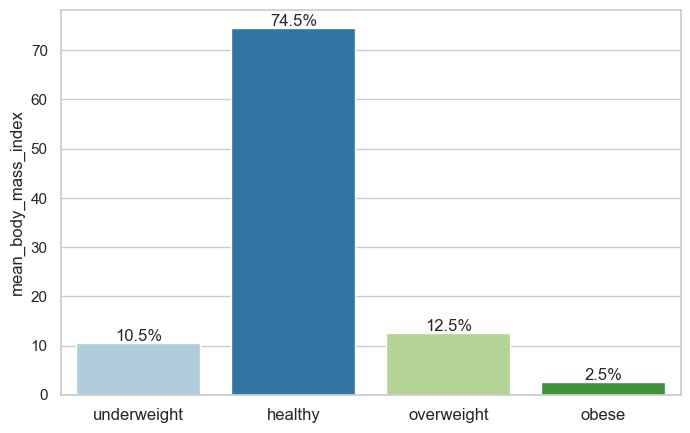

In [69]:
# [Q10] How do the results from 2016 differ from 1975?

# Filter data for the year 2016
df_2016 = df[df['year'] == 1975]

# Calculate average BMI for each country
avg_bmi_per_country = df_2016.groupby('country')['mean_body_mass_index'].mean()

# Define categories based on BMI ranges
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "underweight"
    elif bmi >= 18.5 and bmi <= 24.9:
        return "healthy"
    elif bmi >= 25.0 and bmi <= 29.9:
        return "overweight"
    else:
        return "obese"

# Apply BMI categorization to each country's average BMI
avg_bmi_per_country = avg_bmi_per_country.apply(categorize_bmi)

# Calculate counts of each BMI category for total number of countries
total_countries = len(avg_bmi_per_country)
bmi_counts = avg_bmi_per_country.value_counts()

# Calculate percentages
bmi_percentages = (bmi_counts / total_countries) * 100

# Include "underweight" category with 0 count and percentage
bmi_labels = ['underweight', 'healthy', 'overweight', 'obese']
bmi_counts = bmi_counts.reindex(bmi_labels, fill_value=0)
bmi_percentages = bmi_percentages.reindex(bmi_labels, fill_value=0)

# Create labeled bar plot for BMI categories
labeled_barplot(bmi_percentages, bmi_labels, perc=True)

* In 1975 74.5% were healthy, 12.5% overweight, 10.5% underweight, 2.5% obese
* In 2016 34.0% were healthy, 61.0% overweight, 0.0% underweight, 5.0% obese.
* In 1975, most countries have an average BMI of "healthy weight". In 2016 this number dropped to 34%.
* The majority of countries have an average BMI "overweight" compared to just 12.5% in 1975.
* There are no more countries with an average BMI of "underweight" compared to 10.5% in 1975.
* 5% of countries have an average BMI of "obese" compared to 2.5% in 1975. 

### 2016 vs 1975 by country?

In [70]:
# [Q11] Which countries experienced the largest change in average BMI from 1975-2016? The smallest change? Negative change?

# Calculate average BMI for each year and country
avg_bmi_1975 = df[df["year"] == 1975].groupby("country")["mean_body_mass_index"].mean()
avg_bmi_2016 = df[df["year"] == 2016].groupby("country")["mean_body_mass_index"].mean()

# Create a new DataFrame with calculated values
result_df = pd.DataFrame({
    "country": avg_bmi_2016.index,
    "bmi_1975": avg_bmi_1975.values,
    "bmi_2016": avg_bmi_2016.values,
    "bmi_change": avg_bmi_2016.values - avg_bmi_1975.values
})

# Sort the DataFrame by BMI change in descending order
sorted_df = result_df.sort_values(by="bmi_change", ascending=False)

# Convert the result to a tabular format
table = tabulate(round(sorted_df.head(5),2), headers='keys', tablefmt='pretty')

# Print the tabular representation
print(table)

+-----+-------------+----------+----------+------------+
|     |   country   | bmi_1975 | bmi_2016 | bmi_change |
+-----+-------------+----------+----------+------------+
| 150 | Saint Lucia |  22.81   |   30.0   |    7.19    |
| 93  |  Kiribati   |  23.18   |  29.19   |    6.01    |
| 152 |    Samoa    |  26.21   |  32.08   |    5.87    |
| 78  |  Honduras   |  20.45   |  26.16   |    5.71    |
| 66  |   Gambia    |  18.28   |  23.84   |    5.55    |
+-----+-------------+----------+----------+------------+


In [71]:
# Convert the result to a tabular format
table = tabulate(round(sorted_df.tail(5),2), headers='keys', tablefmt='pretty')

# Print the tabular representation
print(table)

+-----+-----------+----------+----------+------------+
|     |  country  | bmi_1975 | bmi_2016 | bmi_change |
+-----+-----------+----------+----------+------------+
| 63  |  France   |  24.87   |  25.61   |    0.75    |
| 159 | Singapore |  23.03   |  23.72   |    0.69    |
| 89  |   Japan   |  22.02   |  22.69   |    0.67    |
| 123 |   Nauru   |  30.52   |  30.67   |    0.15    |
| 13  |  Bahrain  |  24.76   |  24.42   |   -0.34    |
+-----+-----------+----------+----------+------------+


* Saint Lucia has experienced the largest change between 1975 and 2016. Going from an average BMI of 22.81 to 30.0. A change of 7.19.
* Kiribati is second. Going from 23.18 to 29.19. A change of 6.01.
* Followed by Samoa. Going from 26.21 to 32.08. A change of 5.87.

* At the opposite end Bahrain has experienced a negative change. Going from 24.76 to 24.42. A change of -0.34. This is the only country with a negative change.
* Nauru only experienced a small change between 1975 and 2016. Going from 30.52 to 30.67. A change of 0.15.
* Japan also experienced a small change. Going from 22.02 to 22.69. A change of 0.67. 

### Country with largest BMI per year? 

In [72]:
# [Q12] Has the country with the largest BMI in 2016? The same as 1975? How has BMI changed from 1975-2016?

# Calculate average BMI for each year and country
avg_bmi_per_country_per_year = df.groupby(["year", "country"])["mean_body_mass_index"].mean().reset_index()

# Calculate row numbers within each year group based on descending BMI
avg_bmi_per_country_per_year["rn"] = avg_bmi_per_country_per_year.groupby("year")["mean_body_mass_index"].rank(ascending=False)

# Find the country with the largest BMI for each year
largest_bmi_per_year = avg_bmi_per_country_per_year[avg_bmi_per_country_per_year["rn"] == 1]

# Display only selected columns
selected_columns = ["year", "country", "mean_body_mass_index"]
result_df = largest_bmi_per_year[selected_columns]

# Convert the result to a tabular format
table = tabulate(round(result_df, 1), headers='keys', tablefmt='pretty')

# Display the tabular data
print(table)

+------+------+----------------+----------------------+
|      | year |    country     | mean_body_mass_index |
+------+------+----------------+----------------------+
| 123  | 1975 |     Nauru      |         30.5         |
| 323  | 1976 |     Nauru      |         30.6         |
| 523  | 1977 |     Nauru      |         30.7         |
| 723  | 1978 |     Nauru      |         30.8         |
| 923  | 1979 |     Nauru      |         30.9         |
| 1123 | 1980 |     Nauru      |         31.0         |
| 1323 | 1981 |     Nauru      |         31.1         |
| 1523 | 1982 |     Nauru      |         31.2         |
| 1723 | 1983 |     Nauru      |         31.3         |
| 1923 | 1984 |     Nauru      |         31.4         |
| 2123 | 1985 |     Nauru      |         31.5         |
| 2323 | 1986 |     Nauru      |         31.6         |
| 2523 | 1987 |     Nauru      |         31.7         |
| 2723 | 1988 |     Nauru      |         31.7         |
| 2803 | 1989 | American Samoa |         31.9   

* From 1975 - 1988 Nauru had the largest average BMI compared to any other country.
* In 1975 Nauru was classed as an obese country (> 30.0).
* In 1989 American Samoa became the country with the largest average BMI. American Samoa continues to have the largest average till this day.

### Country with smallest BMI per year?

In [73]:
# [Q13] Has the country with the smallest BMI in 2016, the same as 1975? How has BMI changed from 1975-2016?

# Calculate average BMI for each year and country
avg_bmi_per_country_per_year = df.groupby(["year", "country"])["mean_body_mass_index"].mean().reset_index()

# Calculate row numbers within each year group based on ascending BMI
avg_bmi_per_country_per_year["rn"] = avg_bmi_per_country_per_year.groupby("year")["mean_body_mass_index"].rank()

# Find the country with the smallest BMI for each year
smallest_bmi_per_year = avg_bmi_per_country_per_year[avg_bmi_per_country_per_year["rn"] == 1]

# Display only selected columns
selected_columns = ["year", "country", "mean_body_mass_index"]
result_df = smallest_bmi_per_year[selected_columns]

# Convert the result to a tabular format
table = tabulate(round(result_df,1), headers='keys', tablefmt='pretty')

# Display the tabular data
print(table)

+------+------+-------------+----------------------+
|      | year |   country   | mean_body_mass_index |
+------+------+-------------+----------------------+
|  14  | 1975 | Bangladesh  |         17.1         |
| 214  | 1976 | Bangladesh  |         17.2         |
| 414  | 1977 | Bangladesh  |         17.3         |
| 614  | 1978 | Bangladesh  |         17.4         |
| 814  | 1979 | Bangladesh  |         17.6         |
| 1014 | 1980 | Bangladesh  |         17.7         |
| 1214 | 1981 | Bangladesh  |         17.8         |
| 1414 | 1982 | Bangladesh  |         17.9         |
| 1614 | 1983 | Bangladesh  |         18.1         |
| 1814 | 1984 | Bangladesh  |         18.2         |
| 2014 | 1985 | Bangladesh  |         18.3         |
| 2214 | 1986 | Bangladesh  |         18.4         |
| 2414 | 1987 | Bangladesh  |         18.5         |
| 2614 | 1988 | Bangladesh  |         18.6         |
| 2814 | 1989 | Bangladesh  |         18.7         |
| 3014 | 1990 | Bangladesh  |         18.8    

* From 1975 to 1991 Bangladesh had the smallest average BMI compared to any other country.
* In 1987 Bangladesh became the last country to move from "underweight" (< 18.5) to "healthy weight" (18.5 -24.9)
* From 1992 to 2000 Viet Nam had the smallest average BMI compared to any other country.
* From 2001 to 2004 Timor-Leste had the smallest average BMI compared to any other country.
* From 2005 Ethiopia had the smallest average BMI compared to any other country. Both Ethiopia and Eritrea had the smallest average BMI in 2016 with a BMI of 20.5.